# Problem Set 1

 - Due Date: February 26, 2025 
 - Time: 11:59pm
 - We will deduct 3 points (out of 10) for submissions that are late but less than 1 hour late.
 - Submissions that are more than 1 hour late give 0 points. 

__Upload your solutions to Canvas__ (if you experience any problems with Canvas, e-mail your solution to shsu@utexas.edu or priyansh@utexas.edu)

We will deduct points if the following requirements are not fulfilled:

 - hand in your solutions as a single Jupyter Notebook
 - answers (except for code) should be written in Markdown
 - use comments in the code sections to explain what you do
 - you can work in groups of three, but everyone has to hand in their own write-up of the solution
 - if you face a problem that you are not able to solve or you think your answer is wrong, explain why you think it is wrong and what you would expect.
 - make sure that figures are properly labelled: label the axes and add a legend.


Do not forget to add your name to the problem set solution.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In this problem, we want to plot the balance of a bank account over time.

#### (1a)

Assume the initial balance in the account is $b_0$. The bank pays an interest rate $r$ in every period. 
 
In every period the owner of the bank account receives an income of $0.5$ that goes directly to the bank account, starting from period 1, so that $b_1 =(1+r)b_0+0.5$.

Set $r = 0.1$ and $b_0 = 5$.

Plot the first 20 periods of the bank account, starting in period 0.

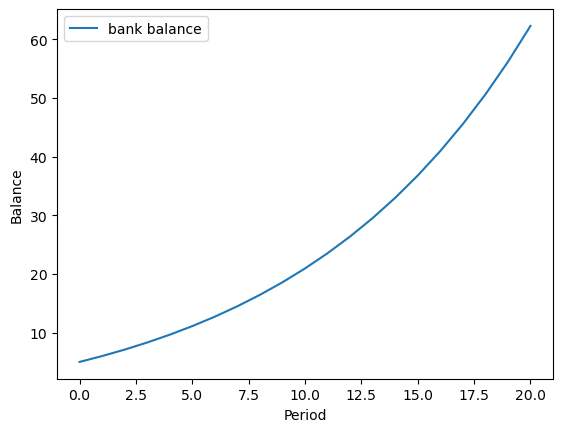

In [2]:
r = 0.1 # Interest rate
T = 20 # No. of periods
b = np.empty(T+1) # Initializing an empty array
b[0] = 5 # Initial balance

for t in range(T): 
    b[t+1] = (1 + r) * b[t] + 0.5
    
plt.plot(b, label='bank balance')
plt.ylabel('Balance')
plt.xlabel('Period')
plt.legend()
plt.show()

#### (1b)

Now assume that instead of receving an income of 0.5 in every period, the owner of the bank account receives a random income in every period. In particular, assume that in every period the income of the bank account owner is drawn randomly from a normal distribution with mean $\mu = 0.5$ and standard deviation $\sigma = 2$. 

Set $r = 0.1$ and $b_0 = 5$.

Plot the first 20 periods of the bank account, starting in period 0.

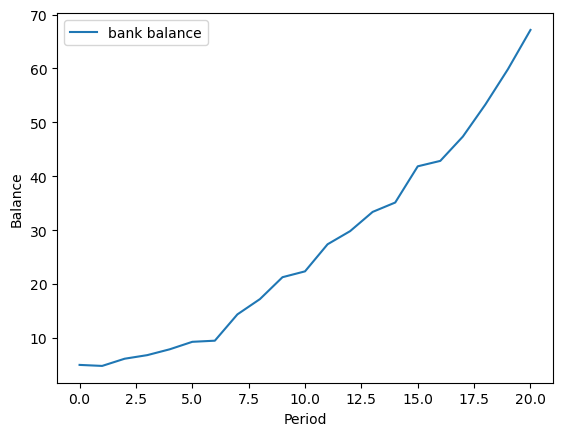

In [3]:
r = 0.1
T = 20
b = np.empty(T+1)
b[0] = 5

for t in range(T): 
    b[t+1] = (1 + r) * b[t] + (2 * np.random.randn() + 0.5)

plt.plot(b, label='bank balance')
plt.ylabel('Balance')
plt.xlabel('Period')
plt.legend()
plt.show()

#### (1c)

Briefly discuss which income process a person that is risk averse would prefer: the one in __(a)__ or the one in __(b)__? 


Would your answer change if $\mu > 0.5$ in __(b)__?

**(1c) Answer:** A risk averse person would prefer the income process from 1(a) since their income is fixed in this scenario. However, when we increase the $\mu$ > 0.5, we see that it gives higher returns when compared to the returns from income process in 1(a). Thus, it is ambiguous and depends on the exact $\mu$ as well as the degree of risk aversion.

#### (1d)

Same setup as in __(b)__ but instead of assuming a standard deviation of 2, increase the standard deviation to 6.

The interest rate the bank account owner receives depends on whether the bank balance is positive or negative.
When the bank balance is positive, the bank pays an interest rate of $r_+ = 0.1$. When the bank balance is negative, the bank charges an interest rate of $r_{-} = 0.2$.

Set $b_0 = 5$.

Plot the first 100 periods of the bank account, starting in period 0.

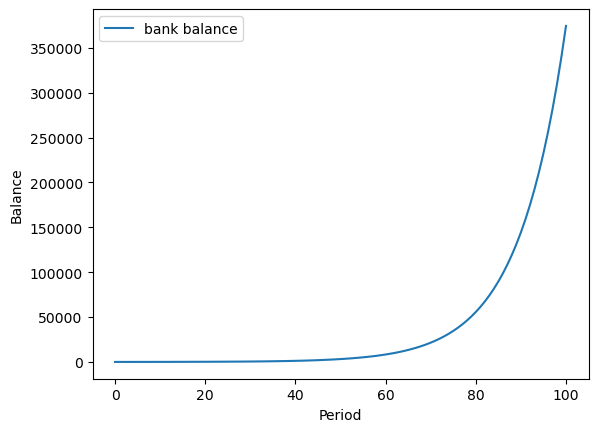

[  5.          15.74763252  11.9517996   15.90893641  13.68489947
  21.27515445  33.90032753  29.05069547  38.76287126  49.00330736
  55.57159843  56.14488697  60.30775631  73.29978855  90.1642043
 104.09811092 120.33273738 143.81953055 157.99796945 165.08429086]


In [4]:
# Note: the dynamics depend on the random draws.
# In this part, we show two different possible outcomes

np.random.seed(20250227) # Positive

T = 100
b = np.empty(T+1)
b[0] = 5

for t in range(T): 
    if b[t] >= 0: 
        r = 0.1
    else: 
        r = 0.2
    b[t+1] = (1 + r) * b[t] + (6 * np.random.randn() + 0.5)

plt.plot(b, label='bank balance')
plt.legend()
plt.ylabel('Balance')
plt.xlabel('Period')
plt.show()
print(b[:20]) # Print the first 20 elements of the array for inspection

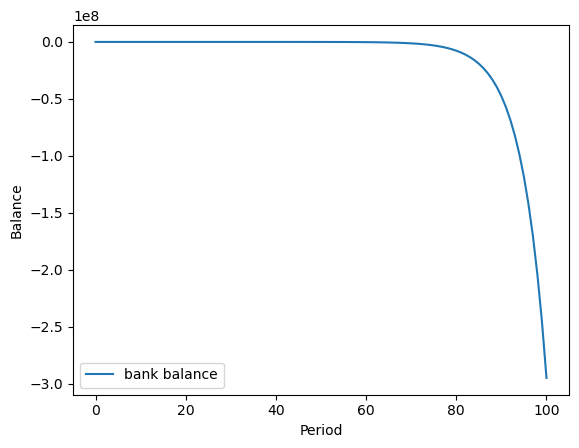

[   5.            8.8146738     8.49896111    0.79450621   -5.4398374
    1.24486727    0.8300661     2.12832498   -3.42425832   -8.78020376
  -22.66365983  -29.66596744  -28.66833808  -29.57267473  -39.22783647
  -52.81085368  -61.2418651   -75.5400721   -86.74596442 -101.93776519]


In [5]:
np.random.seed(123456) # Negative

T = 100
b = np.empty(T+1)
b[0] = 5

for t in range(T): 
    if b[t] >= 0: 
        r = 0.1
    else: 
        r = 0.2
    b[t+1] = (1 + r) * b[t] + (6 * np.random.randn() + 0.5)

plt.plot(b, label='bank balance')
plt.legend()
plt.ylabel('Balance')
plt.xlabel('Period')
plt.show()
print(b[:20]) # Print the first 20 elements of the array for inspection

#### (1e) 

Consider again the situation from problem __(a)__, i.e., the bank owner receives an income of 0.5 in every period which goes straight to the bank account. 

The bank account owner withdraws 0.7 from the bank account in every period. 

Set $r = 0.1$ and $b_0 = 1$.

When does the bank account balance become negative?

In [6]:
r = 0.1 # Interest rate
b_0 = 1 # Initial balance
withdrawal = 0.7 # Amount withdrawn each period
balance = b_0
t = 0 # Starting period

# Iterate to find when balance becomes negative
while balance >= 0:
    balance = (1 + r) * balance + 0.5 - withdrawal
    t += 1

print(t , 'periods') # This is the period when the balance first becomes negative

8 periods


#### (1f) 

How does your answer in __(e)__ change when $r = 0.15$. Explain why we see this different result.

In [7]:
r = 0.15 # Interest rate
b_0 = 1 # Initial balance
withdrawal = 0.7 # Amount withdrawn each period
balance = b_0
t = 0 # Starting period

# Iterate to find when balance becomes negative
while balance >= 0:
    balance = (1 + r) * balance + 0.5 - withdrawal
    t += 1

print(t , 'periods') # This is the period when the balance first becomes negative.

10 periods


The number of periods increases because you receive a higher interest rate, so it takes longer until the bank balance becomes negative. 

## Problem 2
For this exercise, only use the libraries `numpy` and `matplotlib.pyplot`.


Throughout this problem, consider the following process:
$$x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \varepsilon_t,$$
where $\varepsilon_t$ is independently drawn from a normal distribution with mean $\mu_{\varepsilon}$ and standard deviation $\sigma_{\varepsilon}$, and $\phi_1$ and $\phi_2$ are constant parameters.

#### (2a) 
Set $\phi_1 = 0.5$, $\phi_2 = -0.2$, $\mu_{\varepsilon} = 0$ and $\sigma_{\varepsilon} = 1$.

Set the initial values $x_{0} = 0$ and $x_{-1}=0$.

Plot the first 100 periods starting with $x_1$.

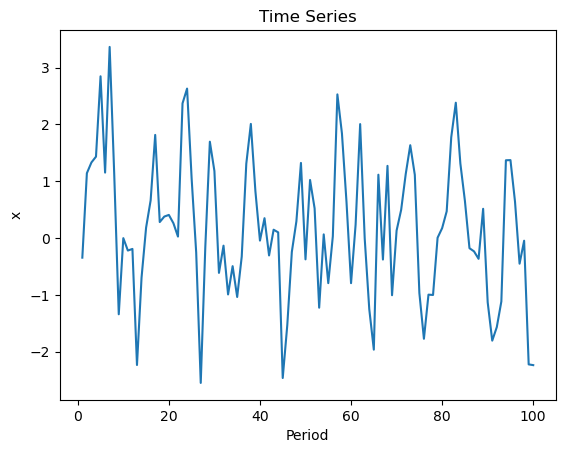

In [8]:
# Parameters
phi1 = 0.5
phi2 = -0.2
mu = 0
sigma = 1

# Initial values
x0 = 0
x_minus1 = 0

# Number of periods
T = 100

# Generate the time series
x = np.empty(T)
# Python uses 0-based index, so x[0] is x at period t = 1
x[0] = phi1 * x0 + phi2 * x_minus1 + np.random.normal(mu, sigma)
x[1] = phi1 * x[0] + phi2 * x0 + np.random.normal(mu, sigma)

for t in range(2, T):
    x[t] = phi1 * x[t-1] + phi2 * x[t-2] + np.random.normal(mu, sigma)

# Plot the time series
plt.plot(range(1, T+1), x)
plt.xlabel('Period')
plt.ylabel('x')
plt.title('Time Series')
plt.show()

#### (2b) 
Now, assume that there is one single "shock" in period 1. In particular, assume that $\varepsilon_1 = 1$ and $\varepsilon_t = 0$ for all $t \neq 1$.

Set $\phi_1 = 0.5$, $\phi_2 = 0$, and set the initial values $x_{0} = 0$ and $x_{-1}=0$.

Plot $x_t$ for $t = 1, 2, ..., 20$.

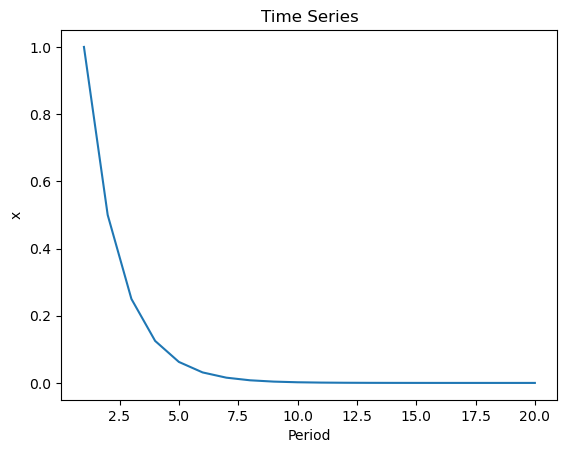

In [9]:
# Parameters
phi1 = 0.5
phi2 = 0
mu = 0
sigma = 1

# Initial values
x0 = 0
x_minus1 = 0

# Number of periods
T = 20

# Shock at t = 1
shock_eps = 1

# Generate the time series
x = np.empty(T)
x[0] = phi1 * x0 + phi2 * x_minus1 + shock_eps
x[1] = phi1 * x[0] + phi2 * x0

for t in range(2, T):
    x[t] = phi1 * x[t-1] + phi2 * x[t-2]

# Plot the time series
plt.plot(range(1, T+1), x)
plt.xlabel('Period')
plt.ylabel('x')
plt.title('Time Series')
plt.show()

#### (2c)
Now, set $\phi_1 = 0.9$ and re-do the exercise in __(b)__. Explain how the result differs from the one in __(b)__.

**(2c) Answer:** When $\phi_1$ increases from 0.5 to 0.9, then the impulse response becomes more persistent.

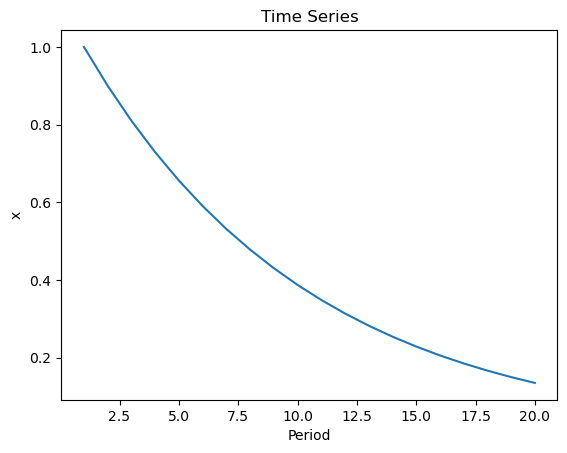

In [10]:
# Parameters
phi1 = 0.9
phi2 = 0
mu = 0
sigma = 1

# Initial values
x0 = 0
x_minus1 = 0

# Number of periods
T = 20

# Shock at t = 1
shock_eps = 1

# Generate the time series
x = np.empty(T)
x[0] = phi1 * x0 + phi2 * x_minus1 + shock_eps
x[1] = phi1 * x[0] + phi2 * x0

for t in range(2, T):
    x[t] = phi1 * x[t-1] + phi2 * x[t-2]

# Plot the time series
plt.plot(range(1, T+1), x)
plt.xlabel('Period')
plt.ylabel('x')
plt.title('Time Series')
plt.show()

#### (2d)
Re-do the exercise from __(b)__ but for the following four cases:
 - $\phi_1 = 0.5$, $\phi_2 = 0.2$
 - $\phi_1 = 0.5$, $\phi_2 = -0.2$
 - $\phi_1 = -0.5$, $\phi_2 = 0.2$
 - $\phi_1 = -0.5$, $\phi_2 = -0.2$
 
Plot the first 20 periods for all four cases in one single plot. Use different colors for the different cases. Add a legend to the plot listing the different parameter combinations. 

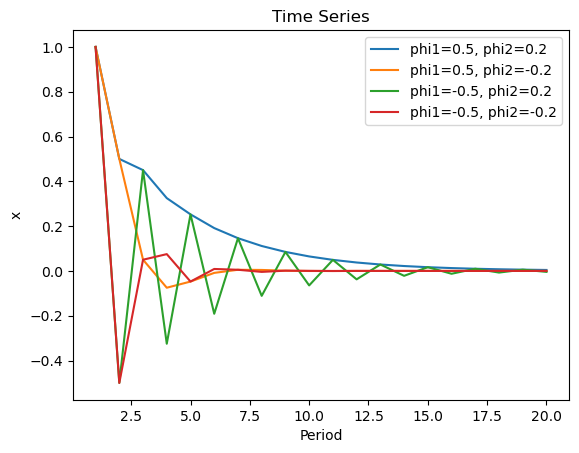

In [11]:
# Parameters
phi1_values = [0.5, 0.5, -0.5, -0.5]
phi2_values = [0.2, -0.2, 0.2, -0.2]

# Initial values
x0 = 0
x_minus1 = 0

# Number of periods
T = 20

# Shock at t = 1
shock_eps = 1

# Generate the time series for each case
for i in range(len(phi1_values)):
    phi1 = phi1_values[i]
    phi2 = phi2_values[i]
    
    # Generate the time series
    x = np.empty(T)
    x[0] = phi1 * x0 + phi2 * x_minus1 + shock_eps
    x[1] = phi1 * x[0] + phi2 * x0
    
    for t in range(2, T):
        x[t] = phi1 * x[t-1] + phi2 * x[t-2]
    
    # Plot the time series
    plt.plot(range(1, T+1), x, label=f'phi1={phi1}, phi2={phi2}')

# Add labels and legend to the plot
plt.xlabel('Period')
plt.ylabel('x')
plt.title('Time Series')
plt.legend()
plt.show()

#### (2e)
Set $\phi_1 = 0.5$, $\phi_2 = -0.2$ and $\mu_{\varepsilon} = 0$ and $\sigma_{\varepsilon} = 1$. 

Simulate 10,000 periods (without plotting it) and compute the average and standard deviation of the random variable $x_t$.

In [12]:
# Parameters
phi1 = 0.5
phi2 = -0.2
mu = 0
sigma =1

# Simulate 10,000 periods
T = 10000
x = np.empty(T)
x[0] = phi1 * x0 + phi2 * x_minus1 + np.random.normal(mu, sigma)
x[1] = phi1 * x[0] + phi2 * x0 + np.random.normal(mu, sigma)

for t in range(2, T):
    x[t] = phi1 * x[t-1] + phi2 * x[t-2] + np.random.normal(mu, sigma)

# Compute the average and standard deviation of x
average_x = np.mean(x)
std_dev_x = np.std(x)

average_x, std_dev_x

(-0.0023022661670096503, 1.1343824142469687)

#### (2f)
Create a function that solves problem __(e)__ but for arbitrary $\phi_1$, $\phi_2$, $\mu_{\varepsilon}$ and $\sigma_{\varepsilon}$, and for an arbitrary number of periods. Set the default values to the same ones as in __(e)__. 
Additionally, include an option that plots the first $N$ periods, where $N$ is an input to the function (set the default to 20). Include the parameter specifications in the title of the plot. Write this "plot option" such that the default option is to not show the plot.

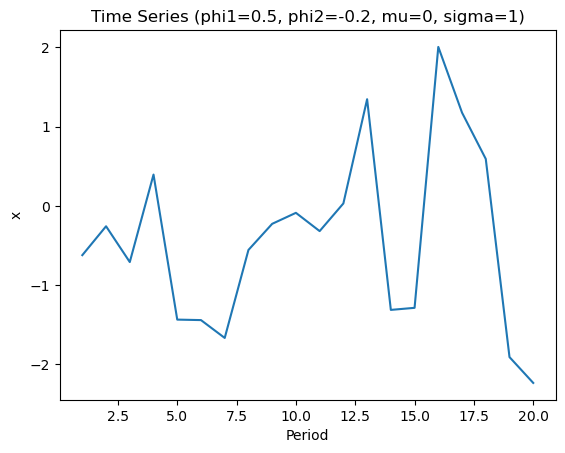

(0.004845641266053275, 1.1432797908521792)

In [13]:
def AR2_Simulation(phi1=0.5, phi2=-0.2, mu=0, sigma=1, T=10000, plot_N=20, show_plot=False):
    # Generate the time series
    x = np.empty(T)
    x[0] = phi1 * x0 + phi2 * x_minus1 + np.random.normal(mu, sigma)
    x[1] = phi1 * x[0] + phi2 * x0 + np.random.normal(mu, sigma)

    for t in range(2, T):
        x[t] = phi1 * x[t-1] + phi2 * x[t-2] + np.random.normal(mu, sigma)

    # Compute the average and standard deviation of x
    average_x = np.mean(x)
    std_dev_x = np.std(x)

    if show_plot:
        # Plot the first N periods
        plt.plot(range(1, plot_N+1), x[:plot_N])
        plt.xlabel('Period')
        plt.ylabel('x')
        plt.title(f'Time Series (phi1={phi1}, phi2={phi2}, mu={mu}, sigma={sigma})')
        plt.show()

    return average_x, std_dev_x

# Check if the function works
average_x, std_dev_x = AR2_Simulation(phi1=0.5, phi2=-0.2, mu=0, sigma=1, T=10000, plot_N=20, show_plot=True)
average_x, std_dev_x

## Problem 3
Download the file "CPI_rawdata.xlsx" from the course's Canvas site. This file contains the monthly Consumer Price Index (CPI) time series downloaded from [here](https://fred.stlouisfed.org/series/CPIAUCSL).


#### (3a)
Import "CPI_rawdata.xlsx" as a pandas DataFrame object and call it "data", as well as the packages `numpy`, `pandas` and `matplotlib.pyplot`.

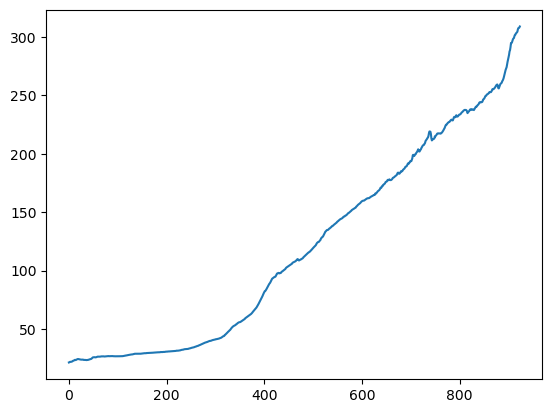

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('CPI_rawdata.xlsx')
plt.plot(data)
plt.show()

#### (3b)
Add a variable "date" that contains the month and year, starting with January 1947.

In [15]:
#adding the date variable
dates = pd.period_range(start="01/1947", freq='M', periods=12*77)
data = data.set_index(dates)
data.index.name = 'Dates'
data

,CPI
Dates,
1947-01,21.480
1947-02,21.620
1947-03,22.000
1947-04,22.000
1947-05,21.950
...,...
2023-08,306.269
2023-09,307.481
2023-10,307.619


#### (3c)
Construct two new variables from the imported CPI series:
 - inflation as the percentage change of the CPI compared to the same month one year before. Call this variable "inflation_yoy" (yoy here stands for year-on-year).
 - inflation as the percentage change of the CPI compared to the previous month. Call this variable "inflation_mom" (mom here stands for month-on-month). Annualize this variable by multiplying it by 12.

In [16]:
# Finding YOY inflation
data['Inflation YOY'] = data['CPI'].pct_change(periods=12) * 100
data.iloc[:24]

,CPI,Inflation YOY
Dates,,
1947-01,21.48,NaN
1947-02,21.62,NaN
1947-03,22.00,NaN
1947-04,22.00,NaN
1947-05,21.95,NaN
1947-06,22.08,NaN
1947-07,22.23,NaN
1947-08,22.40,NaN
1947-09,22.84,NaN


In [17]:
# Finding MOM inflation annualized 
data['Inflation MOM'] = data['CPI'].pct_change(periods=1) * 100 * 12
data.iloc[:24]

,CPI,Inflation YOY,Inflation MOM
Dates,,,
1947-01,21.48,NaN,NaN
1947-02,21.62,NaN,7.821229
1947-03,22.00,NaN,21.091582
1947-04,22.00,NaN,0.000000
1947-05,21.95,NaN,-2.727273
1947-06,22.08,NaN,7.107062
1947-07,22.23,NaN,8.152174
1947-08,22.40,NaN,9.176788
1947-09,22.84,NaN,23.571429


#### (3d)
Compute the mean and standard deviation of "inflation_yoy" and "inflation_mom". 

In [18]:
# Mean and St Dev. of YOY and MOM Inflation
YOY_data = data['Inflation YOY'].agg(['mean', 'std'])
MOM_data = data['Inflation MOM'].agg(['mean', 'std'])

YOY_data, MOM_data

(mean    3.538623
 std     2.905395
 Name: Inflation YOY, dtype: float64,
 mean    3.477799
 std     4.123418
 Name: Inflation MOM, dtype: float64)

#### (3e)
Plot the two variables over time. Make sure to label the axes appropriately and add a legend to the plot containing the names of the plotted variables.

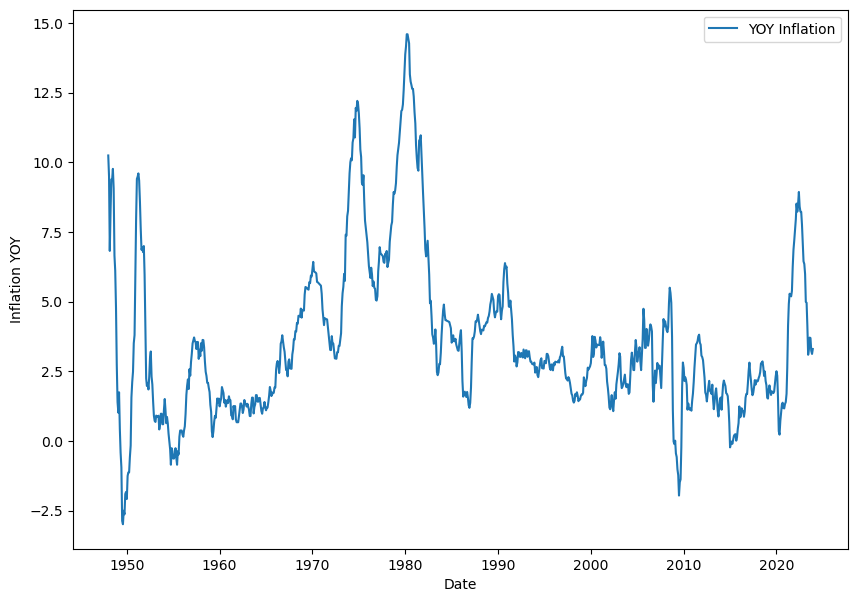

In [19]:
# Plotting YOY inflation
plt.figure(figsize=(10,7))
plt.plot(data.index.to_timestamp(), data['Inflation YOY'], label='YOY Inflation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inflation YOY')
plt.show()

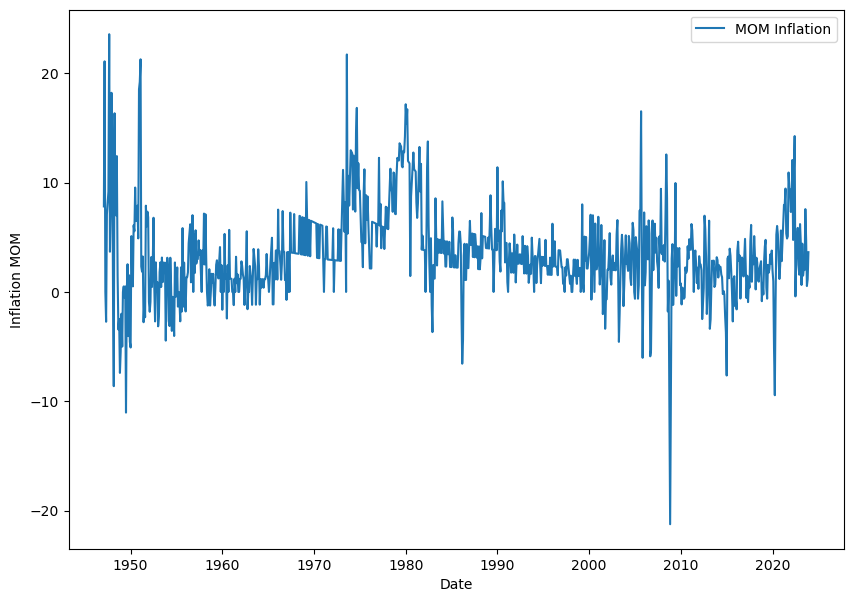

In [20]:
# Plotting MOM Inflation
plt.figure(figsize=(10,7))
plt.plot(data.index.to_timestamp(), data['Inflation MOM'], label='MOM Inflation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inflation MOM')
plt.show()

When focusing on "inflation_yoy", does it look like there were changes in the standard deviation of the two time series over time? Which time period looks particularly stable (i.e., during which periods were the fluctuations of "inflation_yoy" relatively small in magnitude)?

#### (3f)
Use a rolling-window approach to compute a time series of the mean and the standard deviation of "inflation_yoy" where each window is 5 years long. In other words, compute the mean and standard deviation of "inflation_yoy" within a window of five years, starting in January 1947. Then, move one month further and compute the mean and standard deviation of "inflation_yoy" for the five-year window that starts in February 1947. Then, the same for the five years starting in March 1947, and so on. 

Plot the resulting time series of the mean and standard deviation in one plot. Explain in a few sentences what you observe.

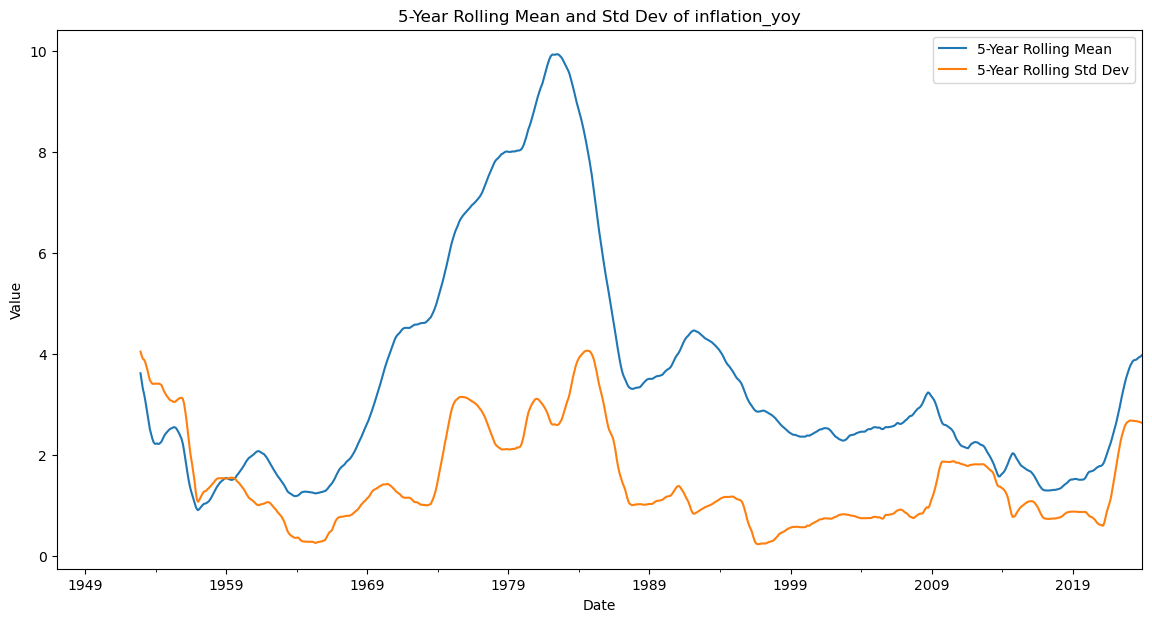

In [21]:
# Compute 5-year (60 months) rolling window mean and standard deviation for "inflation_yoy"
rolling_mean = data["Inflation YOY"].rolling(window=60).mean()
rolling_std = data["Inflation YOY"].rolling(window=60).std()

# Plotting
plt.figure(figsize=(14, 7))
rolling_mean.plot(label='5-Year Rolling Mean')
rolling_std.plot(label='5-Year Rolling Std Dev')
plt.legend()
plt.title('5-Year Rolling Mean and Std Dev of inflation_yoy')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()